# Lab 2 - Time Domain Filtering
This lab is meant to give you an introduction to working with discrete time
signals and systems and implement some temporal filters in discrete time from
scratch using Python.

**Team Members**: Mingheng Wu, Yuxin Zhang

In [85]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import copy
import pylab as pl
import time as t
import scipy

from IPython import display
from scipy.io import wavfile
from PIL import Image 
from scipy import signal
from scipy.signal import convolve2d

# Task 1: Application of Convolution

What are the coefficients of $f(x)g(x)$?

$f(x)g(x) = 1(4+5x+6x^2) + 2x(4+5x+6x^2) + 3x^2(4+5x+6x^2)
= 4+13x+28x^2+27x^3+18x^4$

coefficients: {4, 13, 28, 27, 18}


In [86]:

# your code goes here
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

expected_result = np.array([4, 13, 28, 27, 18])
conv_result = np.convolve(a, b)
print("Convolution result:", conv_result)
print("Are the two results the same?", np.array_equal(conv_result, expected_result))

Convolution result: [ 4 13 28 27 18]
Are the two results the same? True


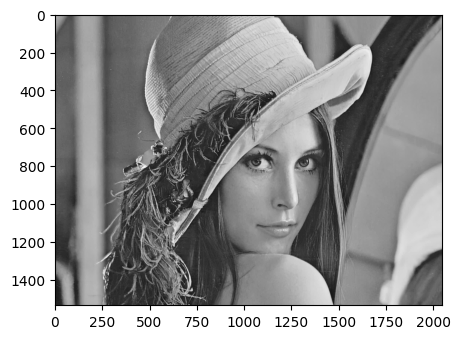

In [87]:
img_gray = Image.open('lenna.jpeg').convert('L')    # Uses standard 8-bit color code (integer)
img_gray = np.array(img_gray)                    # Convert to numpy array

fig = plt.figure(figsize=(5, 5))
_ = plt.imshow(img_gray, cmap ='gray', vmin=0, vmax=255)

In [88]:
kernel_size = 20
smooth_kernel = np.ones((kernel_size, kernel_size)) / kernel_size**2

horiz_edge_kernel = np.array([[-1, -2, -1],
                              [ 0,  0,  0],
                              [ 1,  2,  1]])

vert_edge_kernel = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]])

## Smoothing kernel
Convolution with a smoothen kernel averages the values of neighboring elements. This averaging can diminish sharp transitions and noise.

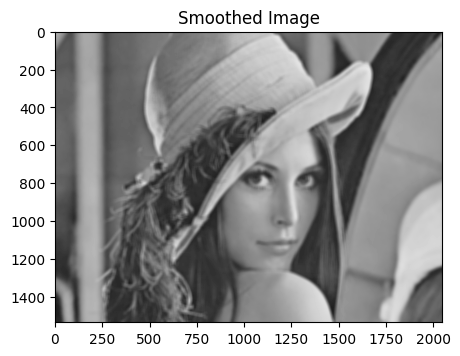

In [89]:
smoothed_img = signal.convolve2d(img_gray, smooth_kernel, mode='same', boundary='symm')

fig = plt.figure(figsize=(5, 5))
_ = plt.imshow(smoothed_img, cmap='gray', vmin=0, vmax=255)
plt.title('Smoothed Image')
plt.show()


## Horizen Edge Kernel
Convolution with horizen edge detection kernel can detect horizontal edges in the images. The negative values in the first row and positive values in the third row capture intensity changes from top to bottom. If the output of the convolution is big, there may be a vertival edge.


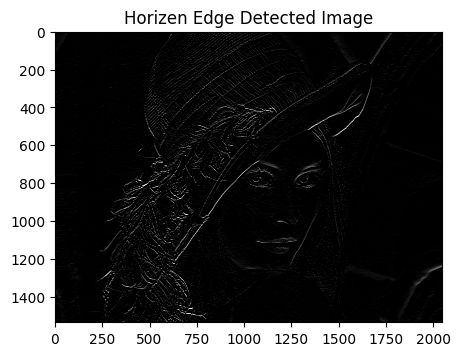

In [90]:
horiz_edge_detect_img = signal.convolve2d(img_gray, horiz_edge_kernel, mode='same', boundary='symm')

fig = plt.figure(figsize=(5, 5))
_ = plt.imshow(horiz_edge_detect_img, cmap='gray', vmin=0, vmax=255)
plt.title('Horizen Edge Detected Image')
plt.show()

## Vertical Kernel
Similar to horizen edge kernel, convolution with vertical edge kernel can detect vertical detect vertical edges in the images.

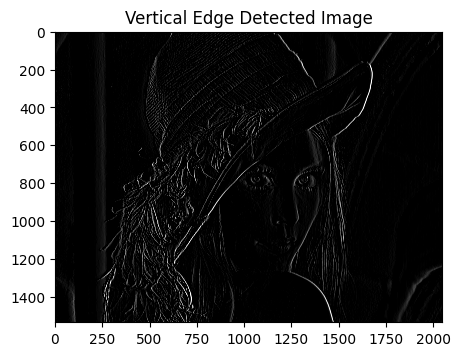

In [91]:
vert_edge_detect_img = signal.convolve2d(img_gray, vert_edge_kernel, mode='same', boundary='symm')

fig = plt.figure(figsize=(5, 5))
_ = plt.imshow(vert_edge_detect_img, cmap='gray', vmin=0, vmax=255)
plt.title('Vertical Edge Detected Image')
plt.show()

# Task 2: Implementing Discrete Time Filters to Filter Time-Series Data

In this part, we will look at various discrete time filters and how they are used to make more sense of time-series data. These are very common, basic and helpful operations that one encounters in anything related to signal processing.

## 1.1 Implementing a Mean Filter

### n is an array containing integers from -5 to 6 (exclusive) with a step size of 1. 

In [92]:
n = np.arange(-5, 6, 1)
print(n)

[-5 -4 -3 -2 -1  0  1  2  3  4  5]


In [93]:
# choose relevant parameters
k = 20
srate = 1000 # sampling rate in Hz
time = np.arange(0, 3, 1/srate) # associated time vector that corresponds to 3 seconds
n = len(time) # length of the time vector
p = 15 # poles for random interpolation
pi = np.pi # value of pi
sigamp1 = 30 # amplitude of base signal 1
sigamp2 = 5 # amplitude of base signal 2

# here are some base signals to work with
base1 = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*sigamp1)
# np.interp(x, xp, fp)
# Returns the one-dimensional piecewise linear interpolant to a function with given discrete data points (xp, fp), evaluated at x.

base2 = 5*np.sin(2*pi*sigamp2*time)

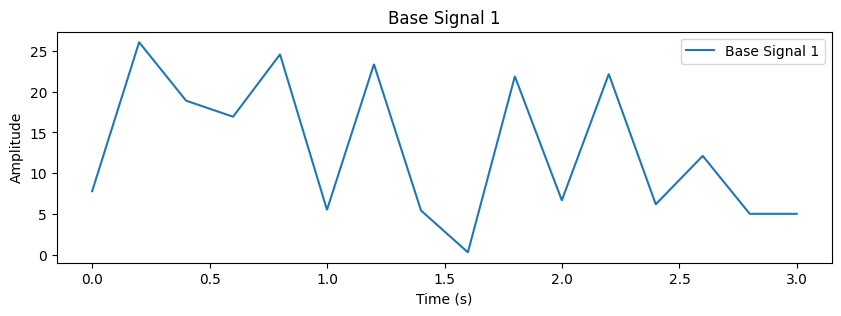

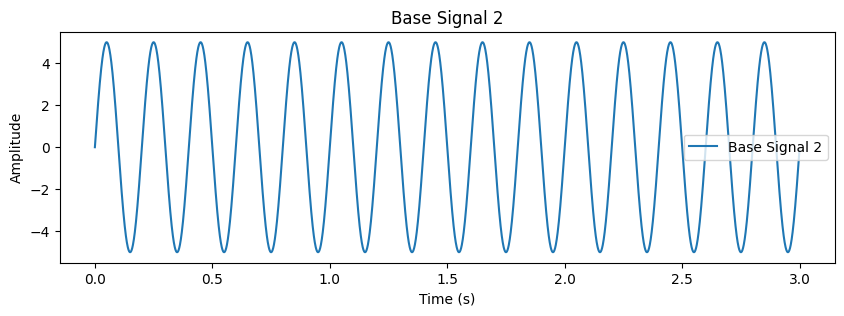

In [94]:
# Plot base signal 1
plt.figure(figsize=(10, 3))
plt.plot(time, base1, label='Base Signal 1')
plt.title('Base Signal 1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Plot base signal 2
plt.figure(figsize=(10, 3))
plt.plot(time, base2, label='Base Signal 2')
plt.title('Base Signal 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In [95]:
# create some random noise to be added to the above base signals
noise = np.random.randn(n)

# add noise to the base signals to create new noisy signals
signal1 = base1 + noise
signal2 = base2 + noise

In [ ]:
# implement the running mean filter
filtsig1 = np.zeros(n) # initialize filtered signal vector for signal 1
filtsig2 = np.zeros(n) # initialize filtered signal vector for signal 2

#implementation of the running mean filter
for i in range(k, n-k):
    filtsig1[i] = np.mean(signal1[i-k:i+k+1])
    filtsig2[i] = np.mean(signal2[i-k:i+k+1])

# compute the time window size in ms and print it
windowsize = (2 * k + 1) / srate * 1000  # duration of the time-window in ms
print("The time window size used was ", windowsize, "ms")

The time window size used was  41.0 ms


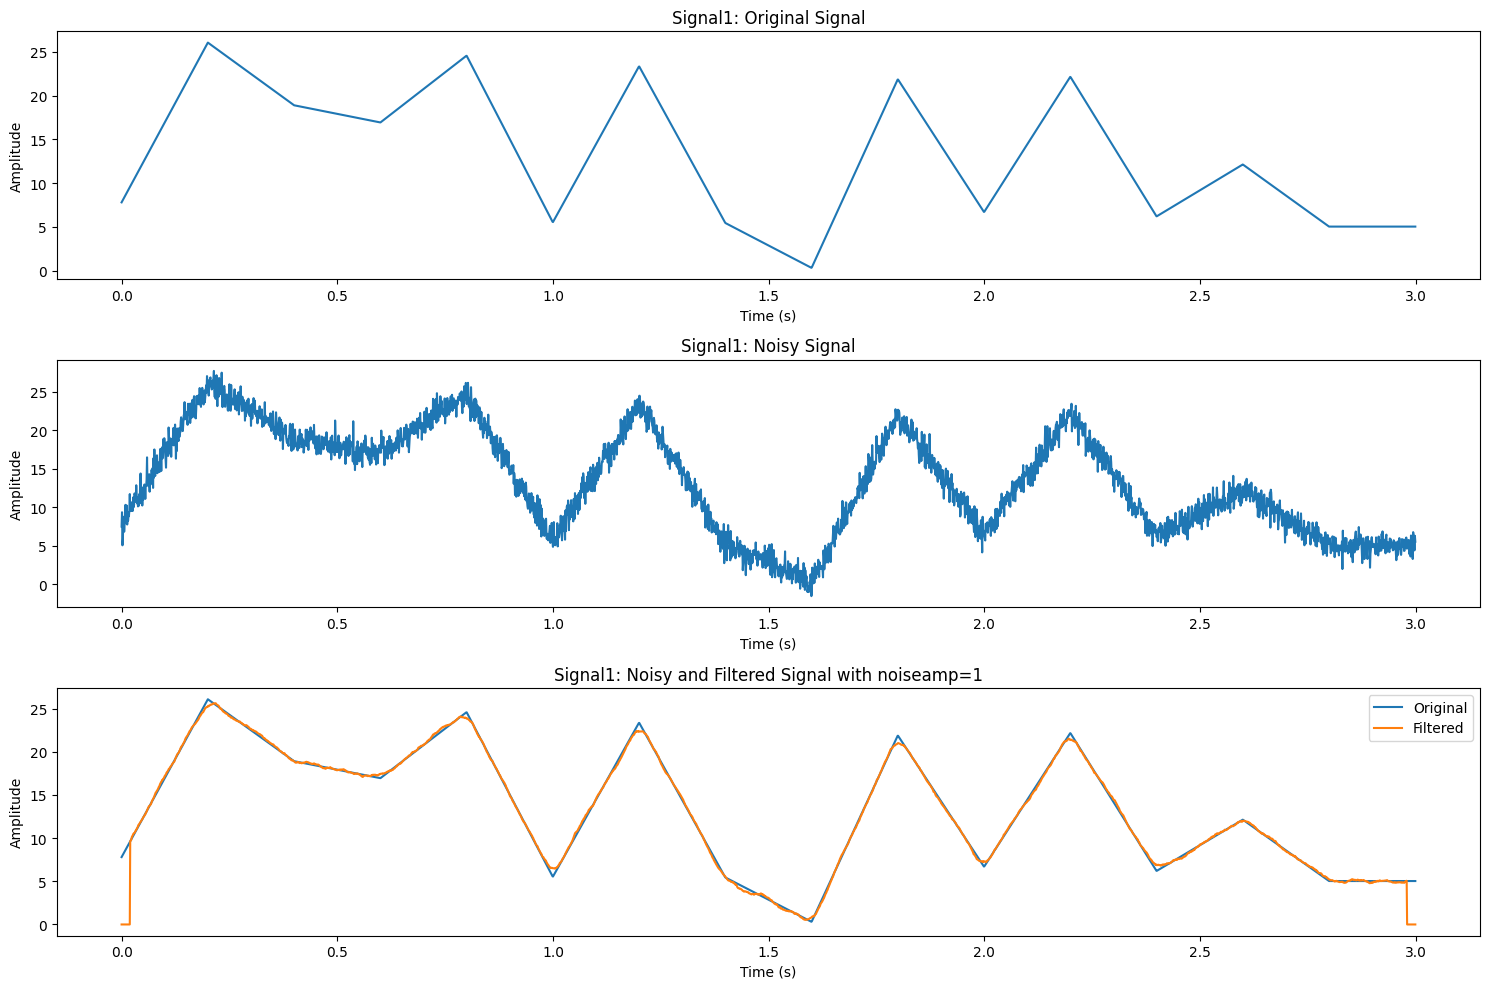

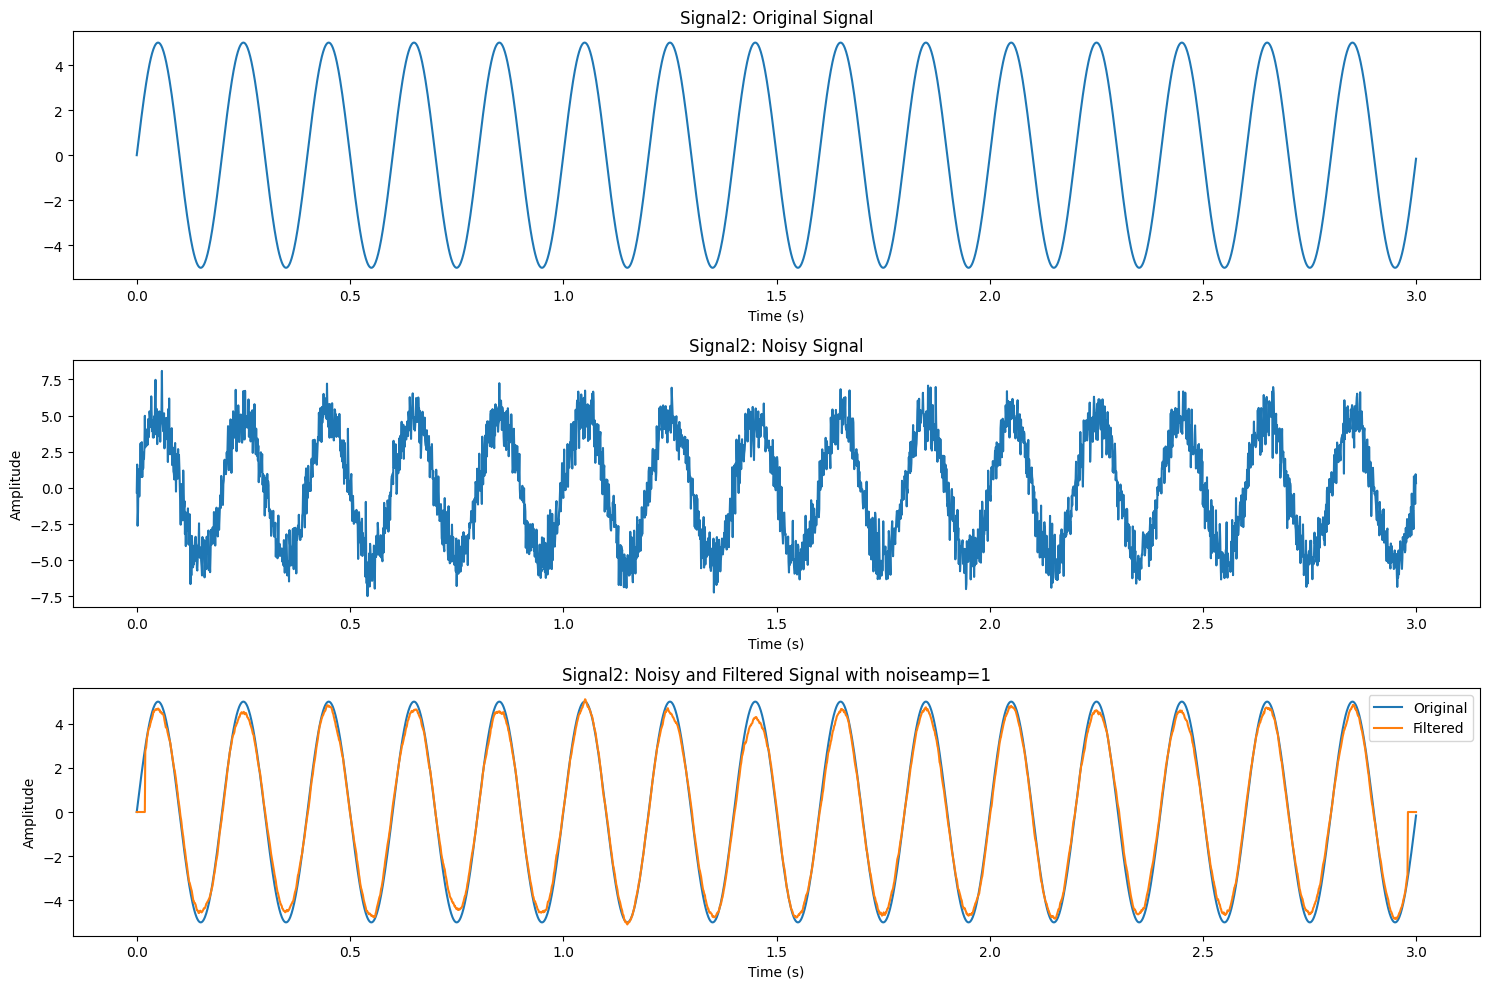

In [ ]:
# plot the required plots

# For base signal 1:
plt.figure(figsize=(15, 10))

# Original signal
plt.subplot(3, 1, 1)
plt.plot(time, base1)
plt.title('Signal1: Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Noisy signal
plt.subplot(3, 1, 2)
plt.plot(time, signal1)
plt.title('Signal1: Noisy Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Noisy and Filtered Signal
plt.subplot(3, 1, 3)
plt.plot(time, base1, label='Original')
plt.plot(time, filtsig1, label='Filtered')
plt.title('Signal1: Noisy and Filtered Signal with noiseamp=1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

# For base signal 2:
plt.figure(figsize=(15, 10))
# Original signal
plt.subplot(3, 1, 1)
plt.plot(time, base2)
plt.title('Signal2: Original Signal')
plt.xlabel('Time (s)')

# Noisy signal
plt.subplot(3, 1, 2)
plt.plot(time, signal2)
plt.title('Signal2: Noisy Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Noisy and Filtered Signal
plt.subplot(3, 1, 3)
plt.plot(time, base2, label='Original')
plt.plot(time, filtsig2, label='Filtered')
plt.title('Signal2: Noisy and Filtered Signal with noiseamp=1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


## Discussion

**Comment on how the results and plots change when you amplify the noise more and also change the value of k.**

When amplify the noise, the deviation between the filtered signal and the original signal will increase.

When decrease the value of k to 10, the filtered signal will contain more small sharp transitions and not so smooth; when increase the value of k to 30, the filtered signal will become smoother and flatter, but it will also cause greater errors at the transition points.  


**Mention and explain any ONE of many possible drawbacks of the mean filter in analysing noisy time-series?**

Mean filter may blur sharp transitions and critical details in the signal because it averages a window of data points.

## 1.2 Implementing a Median Filter to Remove Spikes

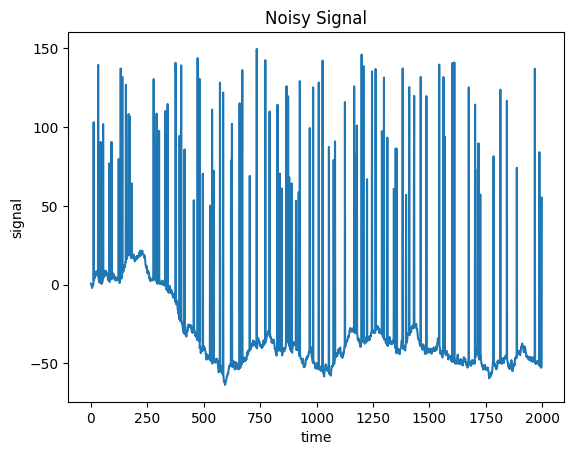

In [98]:
# create signal
n = 2000
# np.cumsum calculates the cumulative sum of elements along a given axis. 
# signal array represents the cumulative sum of the random values
signal = np.cumsum(np.random.randn(n))

# proportion of time points to replace with noise
propnoise = .05

# find noise points
noisepnts = np.random.permutation(n)
noisepnts = noisepnts[0:int(n*propnoise)]

# generate signal and replace points with noise
signal[noisepnts] = 50+np.random.rand(len(noisepnts))*100

fig3=plt.figure(3)
plt.plot(range(0,n),signal)
plt.xlabel('time')
plt.ylabel('signal')
plt.title('Noisy Signal')
plt.show()

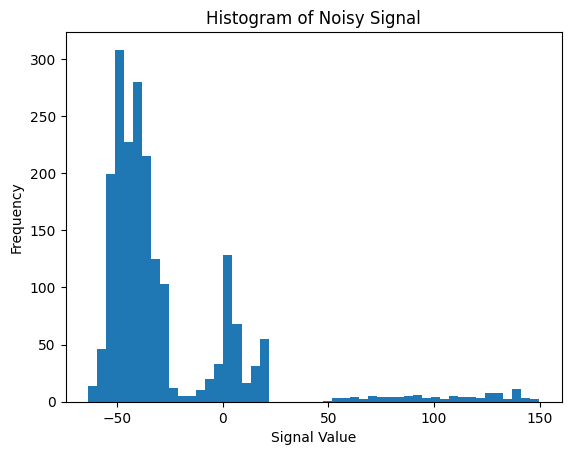

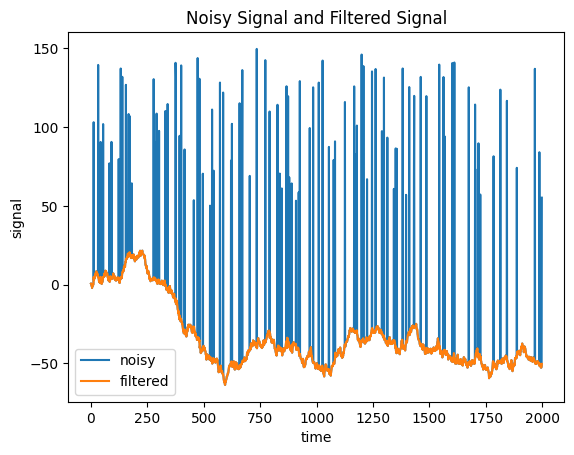

In [ ]:
# use hist to pick threshold
plt.hist(signal, bins=50)
plt.xlabel('Signal Value')
plt.ylabel('Frequency')
plt.title('Histogram of Noisy Signal')
plt.show()

# visual-picked threshold
threshold = 35

# find data values above the threshold
suprathresh = np.where(signal > threshold)[0]

# initialize filtered signal
filtsig = copy.deepcopy(signal)

# loop through suprathreshold points and set to median of k
k = 20 # actual window is k*2+1
for ti in range(0, len(suprathresh)):
    # the for loop to apply the median filter
    i = suprathresh[ti]
    # lower and upper bounds
    lower_bound = max(0, i-k)
    upper_bound = min(len(signal), i+k+1)
    # lower and upper bounds
    filtsig[i] = np.median(signal[lower_bound:upper_bound])

fig3=plt.figure(3)
plt.plot(range(0,n),signal, label="noisy")
plt.plot(range(0,n),filtsig, label="filtered")
plt.xlabel('time')
plt.ylabel('signal')
plt.title('Noisy Signal and Filtered Signal')
plt.legend()
plt.show()


## Discussion

**Compare the mean and median filters in terms of their uses and one advantage and disadvantage one has over the other.**

The mean filter is always used to reduce Gaussian noise to smooth signals, while the median filter is always used to remove spikes and impulse noise from signals.

One of the advantages of mean filter is the computational efficiency, and one of the advantages of median filter is that it can preserve transitions and edges in the signals.

Correspondingly, one of the disadvantages of mean filter is that it will blur the transitions, and one of the disadvantages of median filter is its low efficiency dur to the process of sorting and finding the median.


## Task 3: Denoising an EMG signal

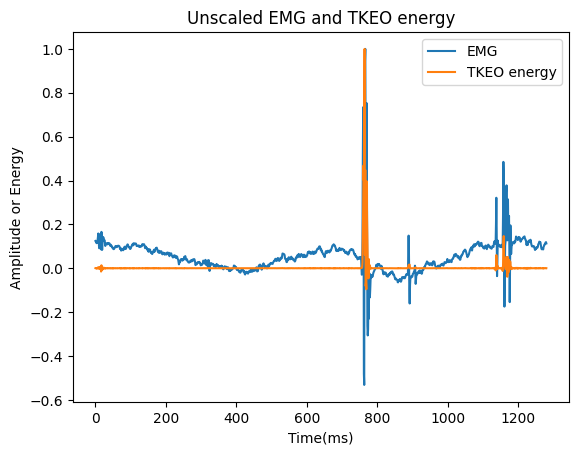

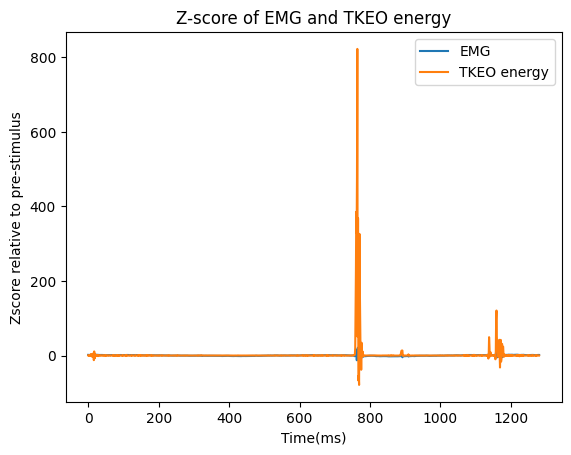

In [100]:
# import data
emgdata = scipy.io.loadmat('EMG.mat')

# extract needed variables
emgtime = emgdata['emgtime'][0]
emg  = emgdata['emg'][0]

# initialize filtered signal
emgf = copy.deepcopy(emg) # this is where the result of 
# the TKEO algorithm should be stored

# apply the TKEO algorithm
for i in range(1, len(emgf)-1):
    emgf[i] = emg[i] ** 2 - emg[i-1]*emg[i+1]

## convert both signals to zscore

# find timepoint zero
time0 = np.argmin(np.abs(emgtime))

# convert original EMG to z-score from time-zero
emg_mean = np.mean(emg[:time0])
emg_std = np.std(emg[:time0])
emgZ = (emg - emg_mean) / emg_std

# same for filtered EMG energy
emgf_mean = np.mean(emgf[:time0])
emgf_std = np.std(emgf[:time0])
emgZf = (emgf - emgf_mean) / emgf_std


fig3=plt.figure(3)
plt.plot(range(0,len(emg)), emg / np.max(emg), label="EMG")
plt.plot(range(0,len(emgf)), emgf / np.max(emgf), label="TKEO energy")
plt.xlabel('Time(ms)')
plt.ylabel('Amplitude or Energy')
plt.title('Unscaled EMG and TKEO energy')
plt.legend()
plt.show()

fig3=plt.figure(3)
plt.plot(range(0,len(emgZ)), emgZ, label="EMG")
plt.plot(range(0,len(emgZf)), emgZf, label="TKEO energy")
plt.xlabel('Time(ms)')
plt.ylabel('Zscore relative to pre-stimulus')
plt.title('Z-score of EMG and TKEO energy')
plt.legend()
plt.show()




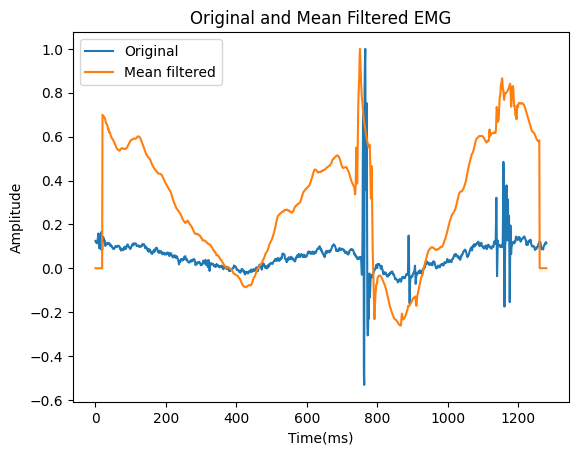

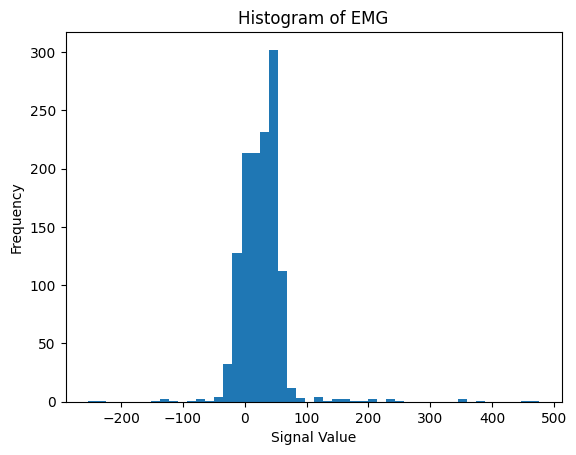

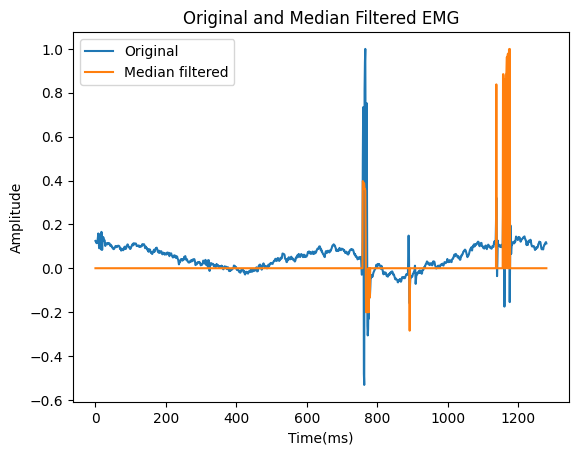

In [101]:
k = 20
n = len(emg)
mean_filtered_emg = np.zeros(n)
for i in range(k, n-k):
    mean_filtered_emg[i] = np.mean(emg[i-k:i+k+1])

fig3=plt.figure(3)
plt.plot(range(0,len(emg)), emg / np.max(emg), label="Original")
plt.plot(range(0,len(mean_filtered_emg)), mean_filtered_emg / np.max(mean_filtered_emg), label="Mean filtered")
plt.xlabel('Time(ms)')
plt.ylabel('Amplitude')
plt.title('Original and Mean Filtered EMG')
plt.legend()
plt.show()


# use hist to pick threshold
plt.hist(emg, bins=50)
plt.xlabel('Signal Value')
plt.ylabel('Frequency')
plt.title('Histogram of EMG')
plt.show()

# visual-picked threshold
lower_threshold = -50
higher_threshold = 100

# find data values above the threshold
suprathresh = np.where((emg > higher_threshold) | (emg < lower_threshold))[0]
median_filtered_emg = np.zeros(len(emg))

# loop through suprathreshold points and set to median of k
k = 20 # actual window is k*2+1
for ti in range(0, len(suprathresh)):
    i = suprathresh[ti]
    lower_bound = max(0, i-k)
    upper_bound = min(n, i+k+1)
    median_filtered_emg[i] = np.median(emg[lower_bound:upper_bound])


fig3=plt.figure(3)
plt.plot(range(0,len(emg)), emg / np.max(emg), label="Original")
plt.plot(range(0,len(median_filtered_emg)), median_filtered_emg / np.max(median_filtered_emg), label="Median filtered")
plt.xlabel('Time(ms)')
plt.ylabel('Amplitude')
plt.title('Original and Median Filtered EMG')
plt.legend()
plt.show()


## Discussion

**How would the other two filters implemented, i.e, the running mean and median filters fare against the TKEO method in analysing the EMG signal in this fashion?**

As the plots shown above, the running mean filter just smooths the signal but removes the spikes we need to capture. The median filter can present some spikes but also subtles some changes in the signal. Compared two these two methods, TKEO can obviously extract spikes better and present a clearer result.

**If you had to use a running mean filter or a median filter to analyse the EMG signal to detect muscle activity, which one would you prefer and why?**

I prefer median filter, because it can preserve some spikes better than mean filter and reduce the interference of other parts of the signal.